## ROC (Reciever Operating Characteristics Curves)
### Mai Yang

It is a useful tool to help us directly compare different models. We can use the area under the graphical cure, referred as the AUC (Area Under the Curve), as a summary of the model's skill. The shape of the graphical curve conveys useful information, such as the expected false positive rate, or sensitivity, and the false negative rate, or specificity.


In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


## Dataset: Lung Cancer Prediction

Data source: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

The study was published in the journal Nature Medicine, and counted data from over 462,000 people in China who were focused for an average of six years. The contributors were divided into two groups: those lived in areas with high levels of air pollution and the other group lived in areas iwth low levels of air pollution.

Discription: Lung cander is the leading cause of cancer death all around the world, accounting for 1.59 millions deaths in 2018. As we know it, the majority of lung cancer cases lead to smoking, but exposure to air pollution and other attributes is also a risk factor. A new study has found that air pollution may be linked to an increased risk of lung cancer, even in nonsmokers. This study area includes four levels of attributes to lung cancers of having levels of either 0: low, 1: medium, or 2: high.

Variables/Columns

* Index
* Patient Id
* Age
* Gender
* Air Pollution
* Alcohol us
* Dust Allergy
* Occupational Hazards
* Genetic Risk
* Chronic Lung Disease
* Balanced Diet
* Obesity
* Smoking
* Passive Smoker
* Chest Pain
* Coughing of Blood
* Fatigue
* Weight Loss
* Shortness of Breath
* Wheezing
* Swallowing Difficulty
* Clubbing of Finger Nails
* Frequent Cold
* Dry Cough
* Snoring
* Levels:
    * 0
    * 1
    * 2

In [2]:
# Load dataset
df = pd.read_csv('Resource/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
# Replace Level category Medium with Low to combine data for binary values for the ROC Curves Results
df['Level'].replace(to_replace=dict(Medium='Low'), inplace=True)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Low
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# Replace Level categories with numeric values
df['Level'].replace(to_replace=dict(Low=0, High=1), inplace=True)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,0
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,1
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,1
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,1


In [5]:
# Check the number of occurences per target value. The classes are quite close.
df['Level'].value_counts()

0    635
1    365
Name: Level, dtype: int64

In [6]:
# Drop index and patient id columns since it is not a necessary thing to have.
df = df.drop(columns=['index', 'Patient Id'])

In [7]:
# Create X (features) and y (target) sets
X = df.drop('Level', axis=1)
y = df['Level'].values

In [8]:
# Split the data into training and testing sets and set to a 50 for testing, equally distributed
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

In [9]:
X_train

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
67,33,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
538,27,1,6,7,7,7,7,6,7,7,...,7,2,7,6,7,6,7,2,3,1
789,39,1,4,5,6,6,5,4,6,6,...,6,5,3,2,4,3,1,7,5,6
559,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
569,27,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,24,2,3,2,2,1,1,1,1,1,...,6,2,1,2,3,4,2,1,1,1
69,32,2,1,6,7,5,3,2,6,2,...,2,3,3,7,7,4,8,7,7,5
512,45,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
344,64,1,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4


In [10]:
X_test

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
553,25,2,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
675,27,1,2,3,4,2,4,3,3,3,...,4,1,2,4,6,5,4,2,1,5
698,32,2,1,6,7,8,7,6,7,7,...,7,3,2,6,4,2,3,1,2,1
218,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
282,62,1,3,2,1,3,2,4,5,1,...,2,4,3,2,1,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,28,1,6,7,8,7,6,7,7,2,...,8,2,3,6,4,2,3,1,2,1
359,38,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
171,62,1,3,2,1,3,2,4,5,1,...,2,4,3,2,1,2,4,2,3,2
555,47,1,6,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2


In [11]:
# Check the number of occurrences per target value in the training data
unique_elements_train, counts_elements_train = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the `y_train` array:")
print(np.asarray((unique_elements_train, counts_elements_train)))

Frequency of unique values of the `y_train` array:
[[  0   1]
 [317 183]]


### The training set result in High is 182, Low is 152, and Medium is 166.

In [12]:
# Check the number of occurrences per target value in the testing data
unique_elements_test, counts_elements_test = np.unique(y_test, return_counts=True)
print("Frequency of unique values of the `y_test` array:")
print(np.asarray((unique_elements_test, counts_elements_test)))

Frequency of unique values of the `y_test` array:
[[  0   1]
 [318 182]]


### The testing set result in high is 183, low is151, and medium is 166.

In [13]:
# Create a StandardScaler() model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [14]:
# Transform the training and testing data by using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Using KNN to Create the ROC Curve

In [15]:
# Import the KNN classifier model form scikit-learn
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/1.000
k: 9, Train/Test Score: 0.998/0.996
k: 11, Train/Test Score: 0.988/0.986
k: 13, Train/Test Score: 0.976/0.978
k: 15, Train/Test Score: 0.960/0.974
k: 17, Train/Test Score: 0.960/0.974
k: 19, Train/Test Score: 0.976/0.984


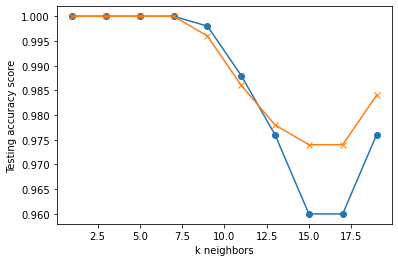

In [16]:
# Loop through different k values to find which has the highest accuracy.
# Note: Odd numbers are used only because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [47]:
# Create the KNN model. Note that k is 5 for the change and provides the best accuracy
knn_model = KNeighborsClassifier(n_neighbors=5)

In [48]:
# Train the KNN model
knn_model.fit(X_train_scaled, y_train)
print("k=13 Test Acc: %.3f" % knn_model.score(X_test_scaled, y_test))

k=13 Test Acc: 1.000


In [49]:
# Show the confusion matrix for the KNN Model
from sklearn.metrics import confusion_matrix

y_pred_knn = knn_model.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[318   0]
 [  0 182]]


In [50]:
# Print Classification Report for the KNN Model
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       318
           1       1.00      1.00      1.00       182

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [51]:
knn_model.predict(X_test_scaled[0:20])

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1],
      dtype=int64)

### Here are the first 20 probability estimates of the testing set.

In [52]:
# Note that each pair always adds up to exactly 1
knn_model.predict_proba(X_test_scaled[0:20])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [53]:
knn_model.predict_proba(X_test_scaled[0:10])[:,1]

array([1., 0., 0., 1., 0., 0., 0., 1., 0., 0.])

#### We can use a different cutoff, or threshold value and say if we increase the cutoff value, we increase the rate of the false negatives. If we decrease the cutoff value, we increase the rate of false positives.

#### The reciever operating characteristic (ROC) Curve help us visualize this tradeoff in a graph. The false positive rate and the true positive rate are calculated or several thresholds, and we plot them against each other to form a graph.

In [54]:
# Import the ROC_Curve Model from scikit-learn
from sklearn.metrics import roc_curve

In [55]:
y_test

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,

In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [57]:
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_proba_knn)

# fpr, fpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)

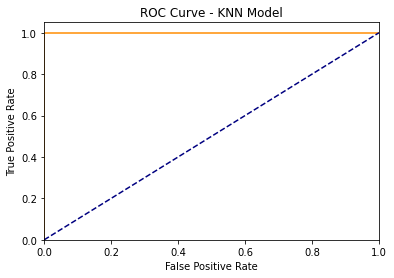

In [58]:
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Model')
plt.show()

#### We will now measure the area under the curve (AUC) for another measure of the robustness of the model. An AUC of 0.5 means that the model is no more predictive than random chance. An AUC of 1.0 is as good as a model can theoretically get, and so for any chosen cutoff points between 0 and 1, the model is as perfect as it can get.

In [59]:
# Compute the AUC for the KNN Model
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"AUC for the KNN Model: {roc_auc_knn}")

AUC for the KNN Model: 1.0


### Using Logistic Regression to Create the ROC Curve

In [60]:
# Create a Logistic regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=10000)

In [61]:
# Train the logistic regression model
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [62]:
# Print the training and testing scores
print(f"Training Data Score: {lr_model.score(X_train, y_train)}")
print(f"Testing Data Score: {lr_model.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [63]:
# Get the probability for each class in the model
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:,1]

In [64]:
# Get the ROC curve data for the logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)

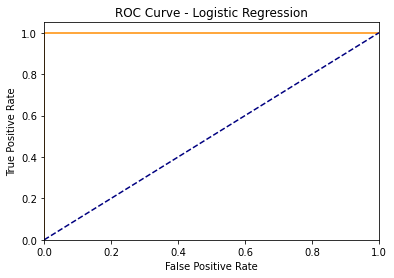

In [65]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.show()

In [66]:
# Compute AUC for the logistic regression model
roc_auc_lr = auc(fpr_lr, tpr_lr)
print(f"AUC for the Logistic Regression Model: {roc_auc_lr}")

AUC for the Logistic Regression Model: 0.9999999999999999


In [67]:
# Show the confusion matrix for the logistic regression model
y_pred_lr = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[318   0]
 [182   0]]


In [68]:
# Print the classification report for the logistic regression model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       318
           1       0.00      0.00      0.00       182

    accuracy                           0.64       500
   macro avg       0.32      0.50      0.39       500
weighted avg       0.40      0.64      0.49       500

